# Projeto - Previsão de renda

## Etapa 1 CRISP - DM: Entendimento do negócio

Estimar a renda dos novos clientes de uma instituição financeira, usando variáveis disponíveis no banco de dados, sem exigir documentos comprobatórios. 

## Etapa 2 Crisp-DM: Entendimento dos dados

### Dicionário de dados

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data referencia                                       | object|
| id_cliente              |  Codigo identificador                                       | INT|
| sexo                    |  sexo cliente                                       | object boleano|
| posse_de_veiculo        |  cliente tem veiculo?                                       | object boleano|
| posse_de_imovel         |  cliente tem imovel?                                       | object boleano|
| qtd_filhos              |  quantidade filhos                                       | INT|
| tipo_renda              |  De onde vem a renda do cliente                                       | object|
| educacao                |  escolaridade cliente                                       | object|
| estado_civil            |  esdado civil                                        | object|
| tipo_residencia         |  tipo residencia                                       | object|
| idade                   |  idade cliente                                       | INT|
| tempo_emprego           |  tempo na empresa atual                                       | float|
| qt_pessoas_residencia   |  quantidade de pessoas na residencia                                       | float|
| renda                   |  valor em reais da renda                                       | float|

In [127]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from prettytable import PrettyTable
from itertools import product
from ydata_profiling import ProfileReport
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Configurando a exibição dos gráficos no notebook
%matplotlib inline

In [128]:
# Carregando dados e removendo colunas desnecessárias
dados_renda = pd.read_csv('previsao_de_renda.csv').drop(['Unnamed: 0', 'id_cliente'], axis=1)

# Exibindo as primeiras linhas do DataFrame
dados_renda.head()

data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0  2015-01-01    F             False             True           0   
1  2015-01-01    M              True             True           0   
2  2015-01-01    F              True             True           0   
3  2015-01-01    F             False             True           1   
4  2015-01-01    M              True            False           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
0        Empresário         Secundário     Solteiro            Casa     26   
1       Assalariado  Superior completo       Casado            Casa     28   
2        Empresário  Superior completo       Casado            Casa     35   
3  Servidor público  Superior completo       Casado            Casa     30   
4       Assalariado         Secundário     Solteiro   Governamental     33   

   tempo_emprego  qt_pessoas_residencia    renda  
0       6.602740                    1.0  8060.34  
1       7.183562                    2.0  1852.15  
2       0.838356                    2.0  2253.89  
3       4.846575                    3.0  6600.77  
4       4.293151                    1.0  6475.97

In [129]:
# Criando uma tabela para exibir informações do DataFrame
info_table = PrettyTable()
info_table.field_names = ["Nome da Coluna", "Contagem Não Nula", "Tipo de Dados"]

# Preenchendo a tabela com informações de cada coluna
for column in dados_renda.columns:
    info_table.add_row([column, dados_renda[column].count(), dados_renda[column].dtype])

# Exibindo a tabela de informações
print(info_table)

+-----------------------+-------------------+---------------+
|     Nome da Coluna    | Contagem Não Nula | Tipo de Dados |
+-----------------------+-------------------+---------------+
|        data_ref       |       15000       |     object    |
|          sexo         |       15000       |     object    |
|    posse_de_veiculo   |       15000       |      bool     |
|    posse_de_imovel    |       15000       |      bool     |
|       qtd_filhos      |       15000       |     int64     |
|       tipo_renda      |       15000       |     object    |
|        educacao       |       15000       |     object    |
|      estado_civil     |       15000       |     object    |
|    tipo_residencia    |       15000       |     object    |
|         idade         |       15000       |     int64     |
|     tempo_emprego     |       12427       |    float64    |
| qt_pessoas_residencia |       15000       |    float64    |
|         renda         |       15000       |    float64    |
+-------

In [130]:
# Verificando e removendo duplicatas
total_duplicatas = dados_renda.duplicated().sum()

# Criando uma tabela para exibir informações sobre as duplicatas
info_duplicatas = PrettyTable()
info_duplicatas.field_names = ["Tipo", "Quantidade"]

# Verificando se existem duplicatas e removendo, se houver
if total_duplicatas > 0:
    dados_renda.drop_duplicates(inplace=True, ignore_index=True)
    info_duplicatas.add_row(["Duplicatas removidas", total_duplicatas])
else:
    info_duplicatas.add_row(["Duplicatas", "Não encontradas"])

# Exibindo informações sobre as duplicatas
print(info_duplicatas)

# Exibindo a quantidade de linhas após remoção das duplicatas
print(f'Quantidade após remoção das linhas duplicadas: {dados_renda.shape[0]}\n')

+----------------------+------------+
|         Tipo         | Quantidade |
+----------------------+------------+
| Duplicatas removidas |    407     |
+----------------------+------------+
Quantidade após remoção das linhas duplicadas: 14593



In [131]:
# Gerando um relatório de perfil dos dados de renda
perfil_renda = ProfileReport(
    dados_renda,
    minimal=False,
    explorative=True,
    dark_mode=True,
    orange_mode=True,
    correlations={"auto": {"calculate": False}}
)

# Exibindo o relatório de perfil no notebook
perfil_renda.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Estatísticas descritivas das variáveis quantitativas

In [132]:
# Calculando estatísticas descritivas para as variáveis quantitativas
dados_renda.describe().T

count         mean          std         min  \
qtd_filhos             14593.0     0.433290     0.746029    0.000000   
idade                  14593.0    43.868910    11.276626   22.000000   
tempo_emprego          12090.0     7.724567     6.718007    0.117808   
qt_pessoas_residencia  14593.0     2.207086     0.909117    1.000000   
renda                  14593.0  5698.140557  8314.021152  118.710000   

                               25%          50%          75%            max  
qtd_filhos                0.000000     0.000000     1.000000      14.000000  
idade                    34.000000    43.000000    53.000000      68.000000  
tempo_emprego             3.006164     6.013699    10.123288      42.906849  
qt_pessoas_residencia     2.000000     2.000000     3.000000      15.000000  
renda                  2018.880000  3488.410000  6379.570000  245141.670000

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

#### Matriz de correlação

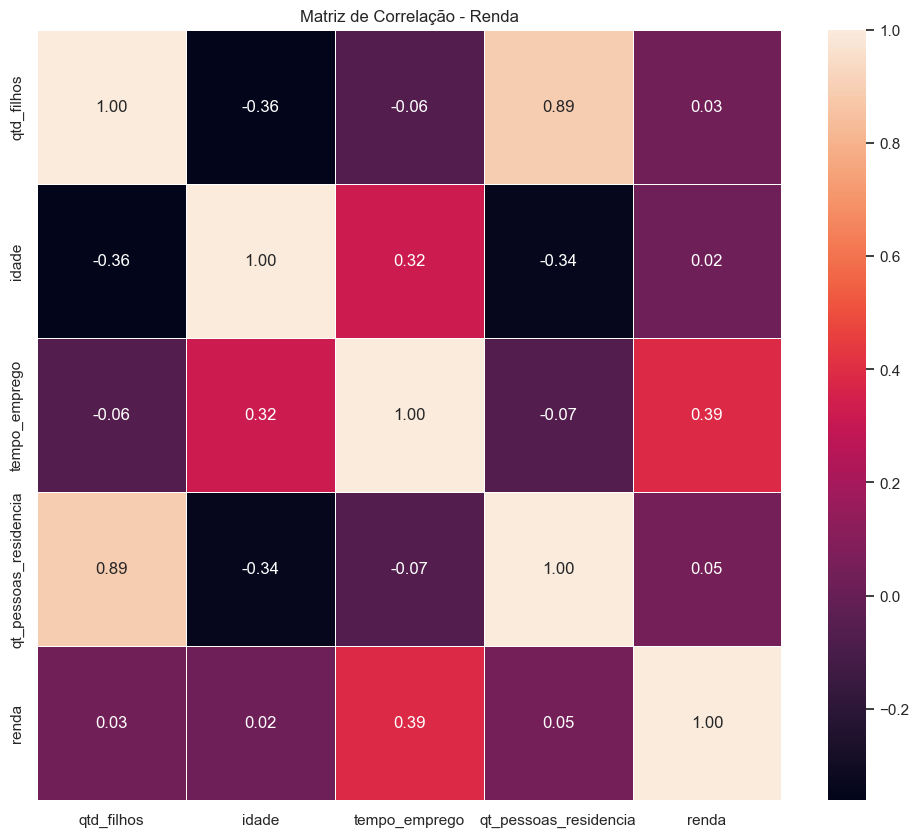

In [133]:
# Selecionando apenas as variáveis numéricas dos dados de renda
numeric_dados_renda = dados_renda.select_dtypes(include='number')

# Calculando a matriz de correlação
matriz_correlacao = numeric_dados_renda.corr()

# Configurando o estilo do gráfico
sns.set(style="white")
plt.figure(figsize=(12, 10))

# Plotando o heatmap da matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", linewidths=.5)

# Adicionando título ao gráfico
plt.title("Matriz de Correlação - Renda")

# Exibindo o gráfico
plt.show()

#### Pair Plot

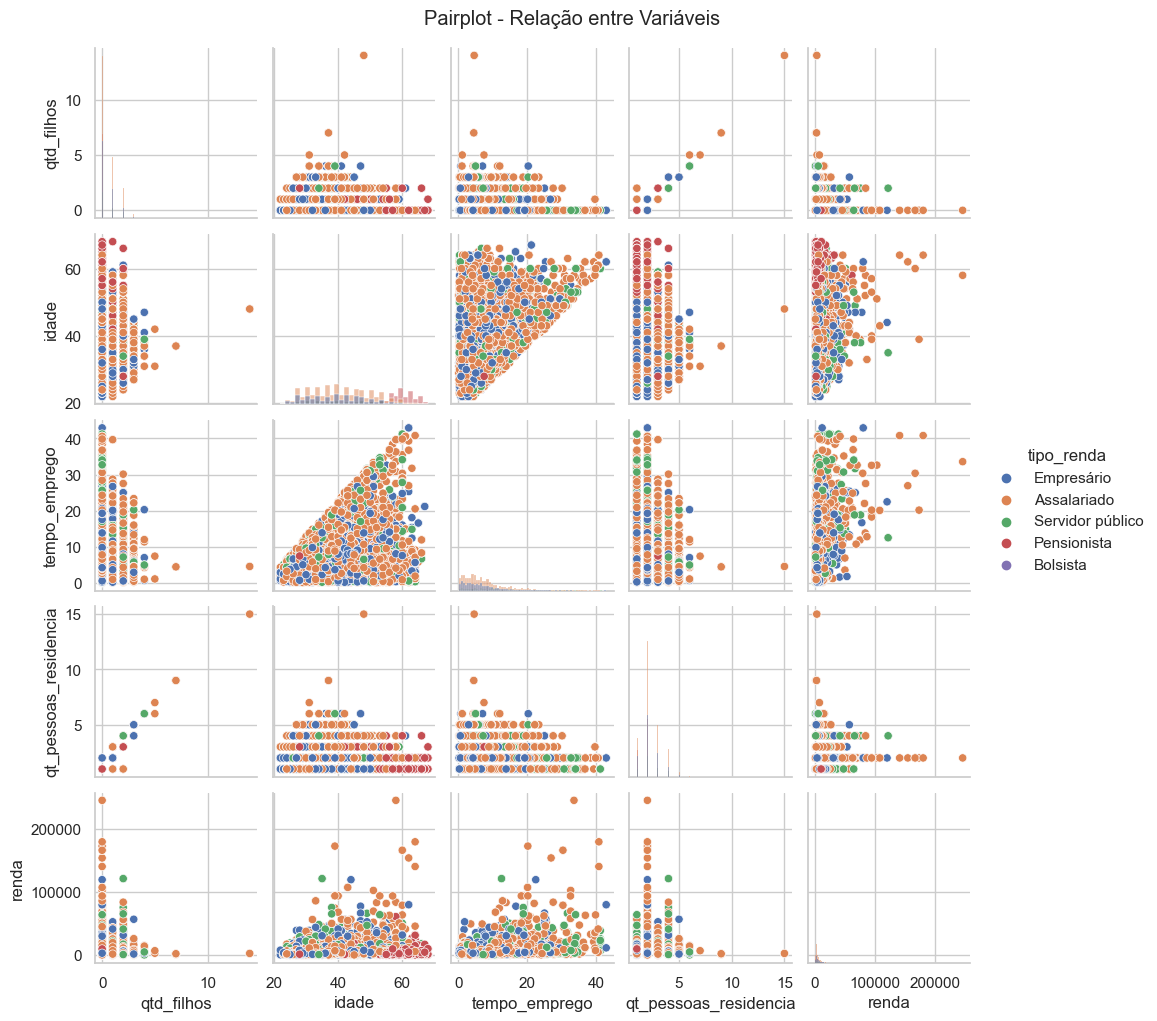

In [134]:
# Selecionando as variáveis para o pairplot e adicionando a variável 'tipo_renda'
pairplot_vars = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
pairplot_data = dados_renda[pairplot_vars + ['tipo_renda']]

# Plotagem do pairplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    sns.set_theme(style="whitegrid")
    g = sns.pairplot(pairplot_data, hue='tipo_renda', diag_kind='hist', height=2)
    g.fig.suptitle("Pairplot - Relação entre Variáveis", y=1.02)
    plt.show()

#### Cluster Plot

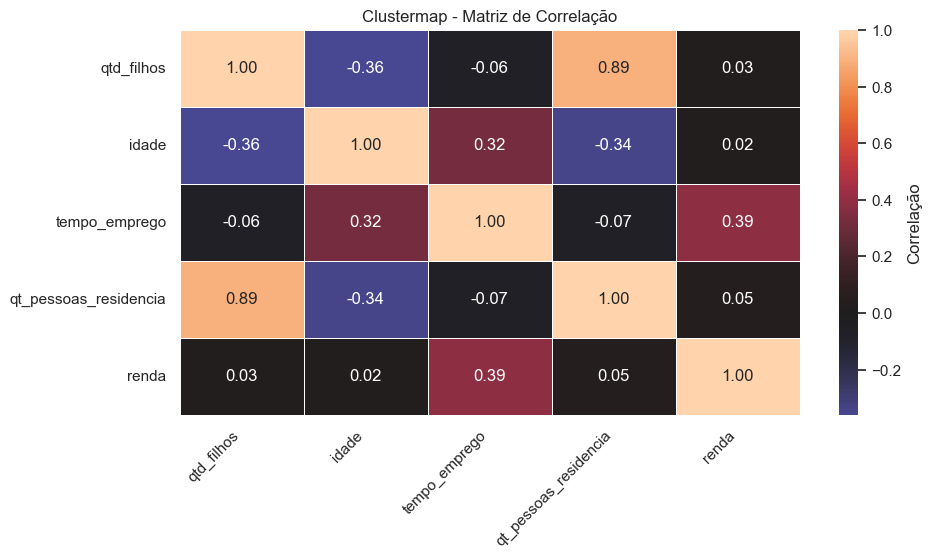

In [135]:
# Selecionando apenas as variáveis numéricas para o clustermap
clustermap_data = dados_renda.select_dtypes(include='number').corr()

# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Plotando o clustermap da matriz de correlação
sns.heatmap(data=clustermap_data, center=0, annot=True, fmt=".2f", linewidths=.5, ax=ax, cbar_kws={'label': 'Correlação'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Clustermap - Matriz de Correlação")

# Exibindo o gráfico
plt.show()

## Scatter plot

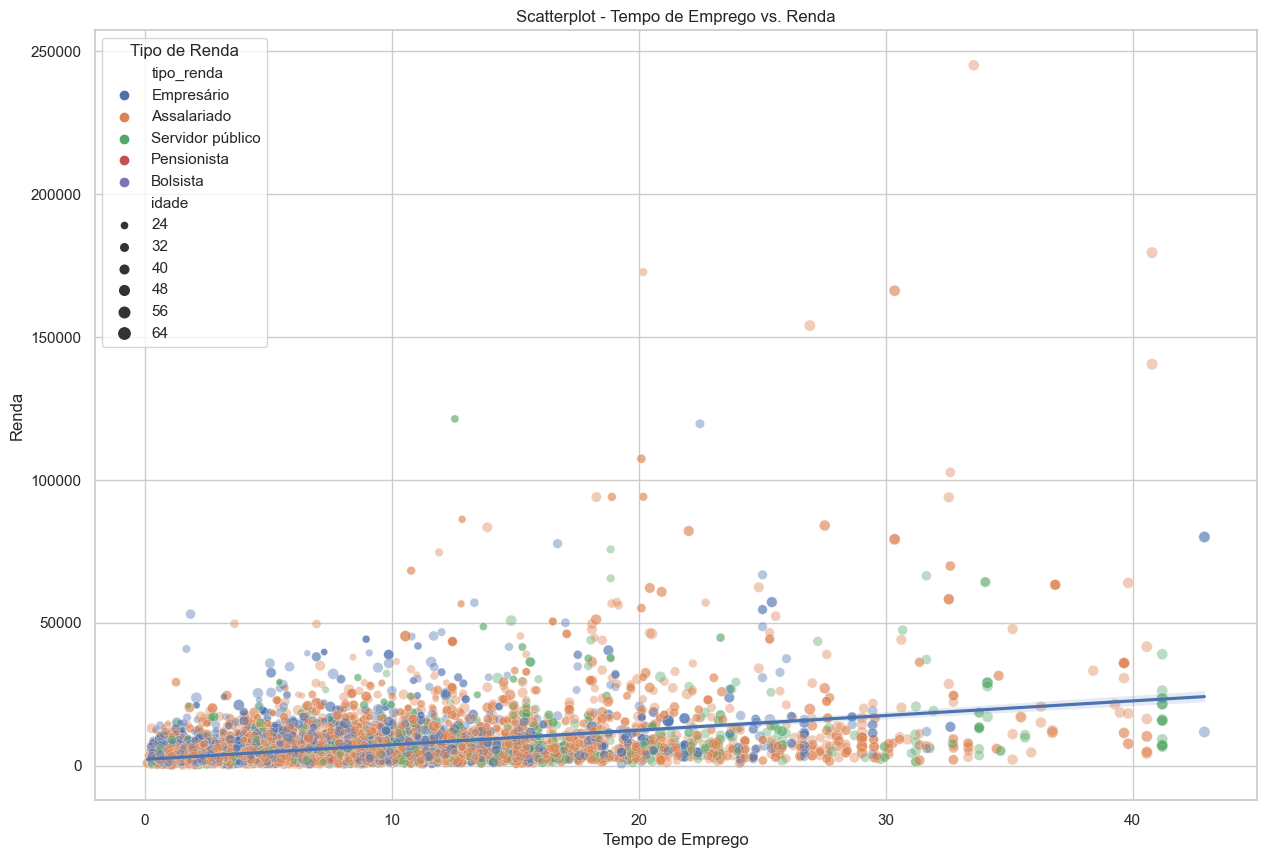

In [136]:
# Scatterplot - Tempo de Emprego vs. Renda
plt.figure(figsize=(15, 10))
sns.scatterplot(x='tempo_emprego', y='renda', hue='tipo_renda', size='idade', data=dados_renda, alpha=0.4)
sns.regplot(x='tempo_emprego', y='renda', data=dados_renda, scatter=False)

# Ajustes visuais
plt.title("Scatterplot - Tempo de Emprego vs. Renda")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Renda")
plt.legend(title="Tipo de Renda")

# Exibindo o gráfico
plt.show()

### Análise das variáveis qualitativas

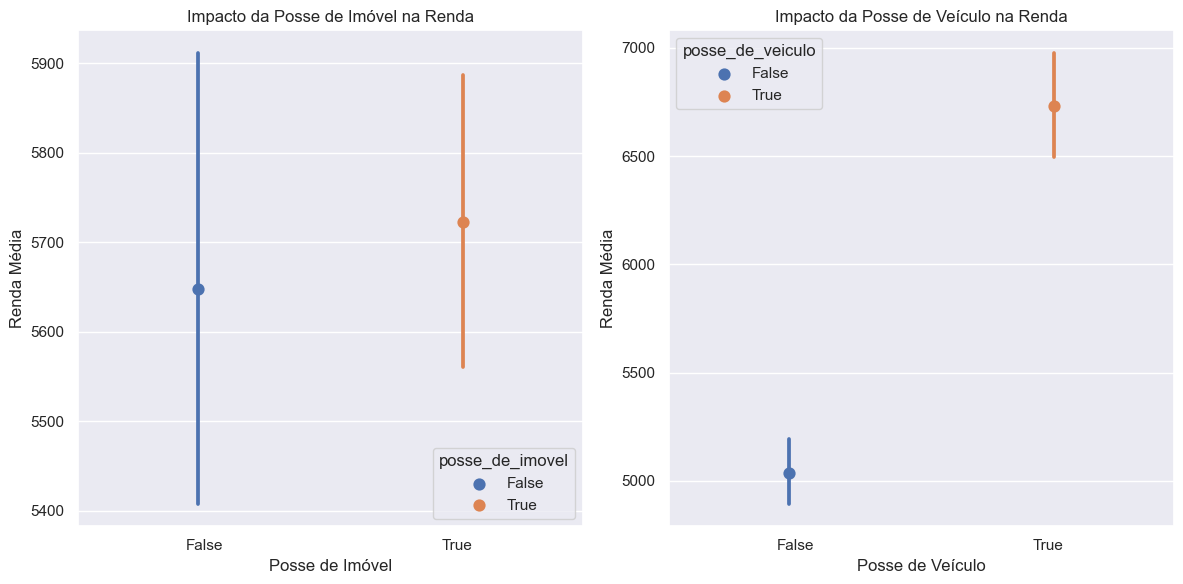

In [137]:
# Relevância das variáveis 'Veículo' e 'Imóvel' na Renda
sns.set(rc={'figure.figsize': (12, 6)})  # Ajustando o tamanho conforme necessário
fig, axes = plt.subplots(1, 2)

# Gráfico de ponto para posse de imóvel
sns.pointplot(x='posse_de_imovel', y='renda', data=dados_renda, dodge=True, ax=axes[0], hue='posse_de_imovel')
axes[0].set_title("Impacto da Posse de Imóvel na Renda")
axes[0].set_xlabel("Posse de Imóvel")
axes[0].set_ylabel("Renda Média")

# Gráfico de ponto para posse de veículo
sns.pointplot(x='posse_de_veiculo', y='renda', data=dados_renda, dodge=True, ax=axes[1], hue='posse_de_veiculo')
axes[1].set_title("Impacto da Posse de Veículo na Renda")
axes[1].set_xlabel("Posse de Veículo")
axes[1].set_ylabel("Renda Média")

# Ajustes visuais
plt.tight_layout()

# Exibindo os gráficos
plt.show()

### Análise das variáveis qualitativas ao longo do tempo

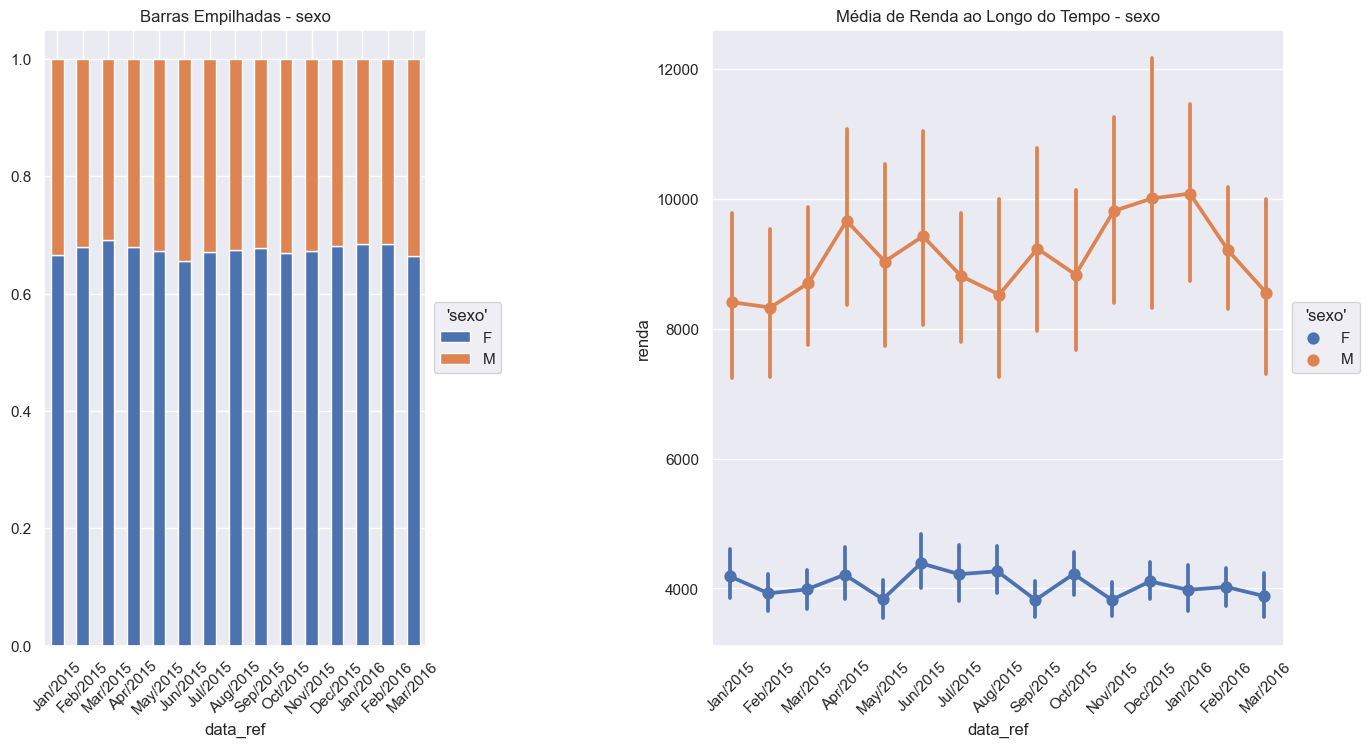

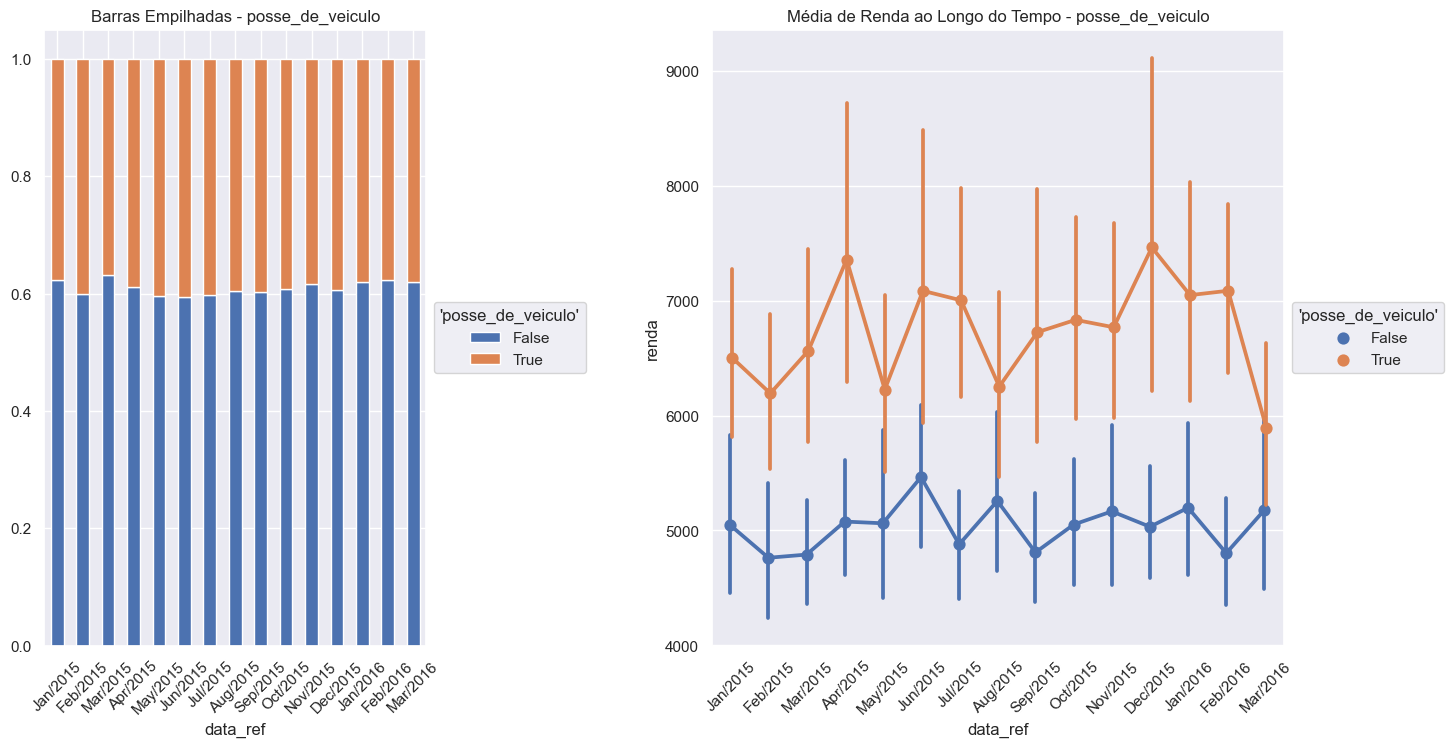

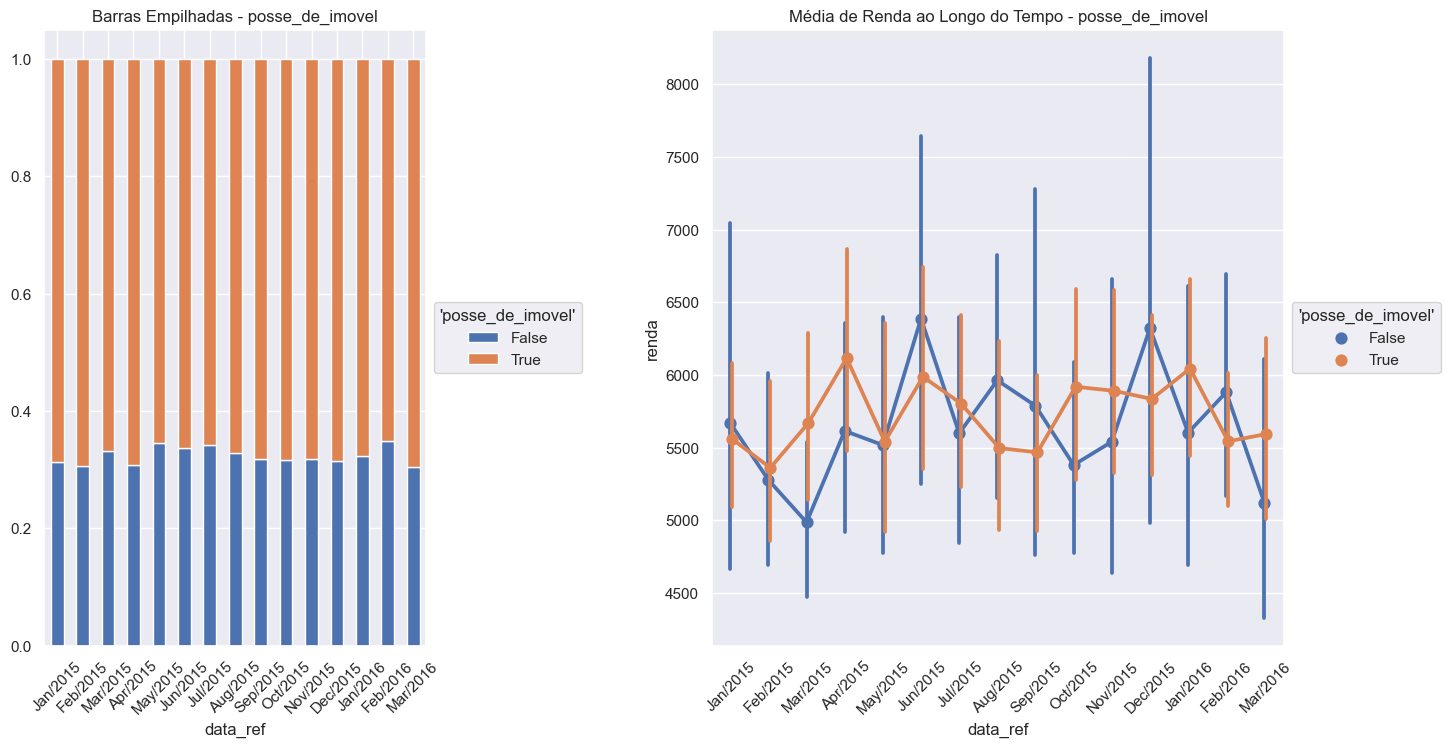

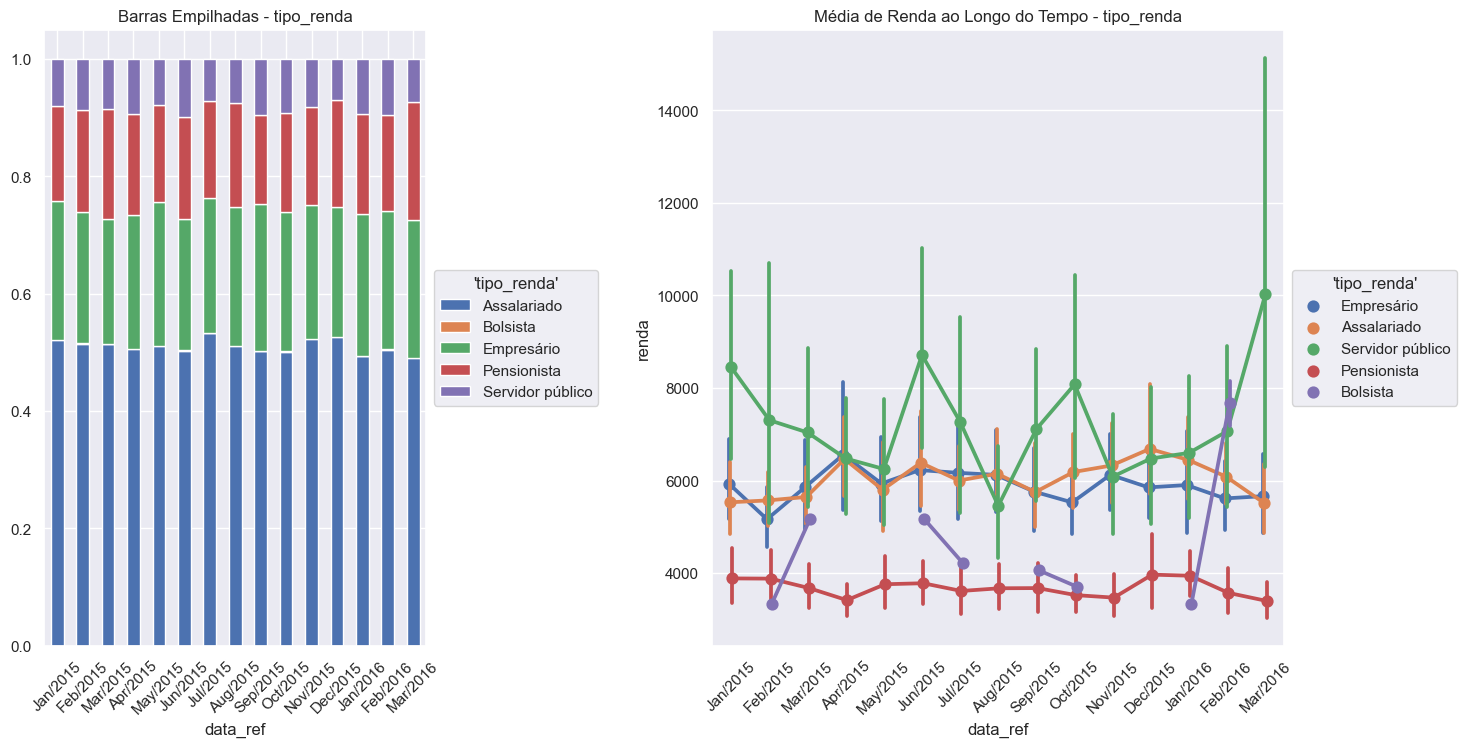

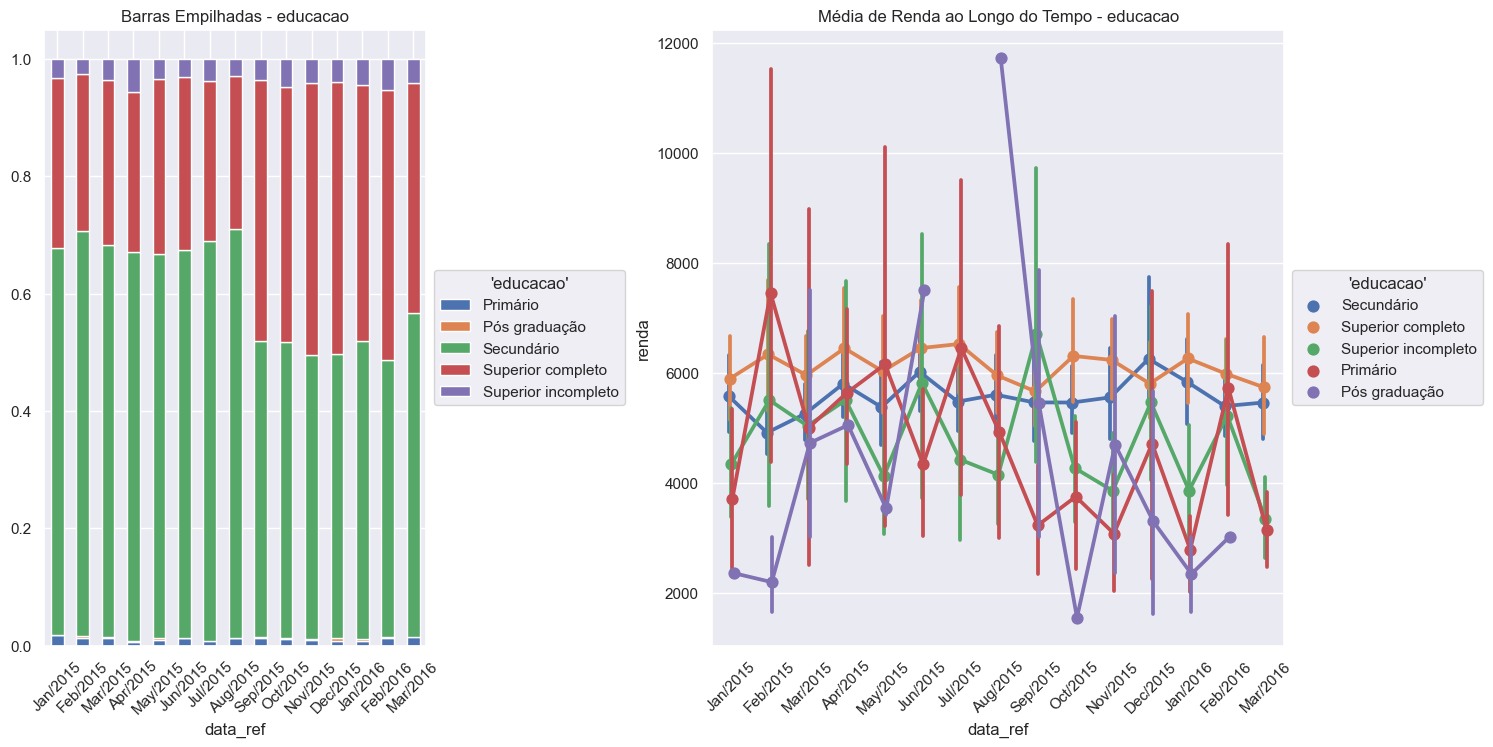

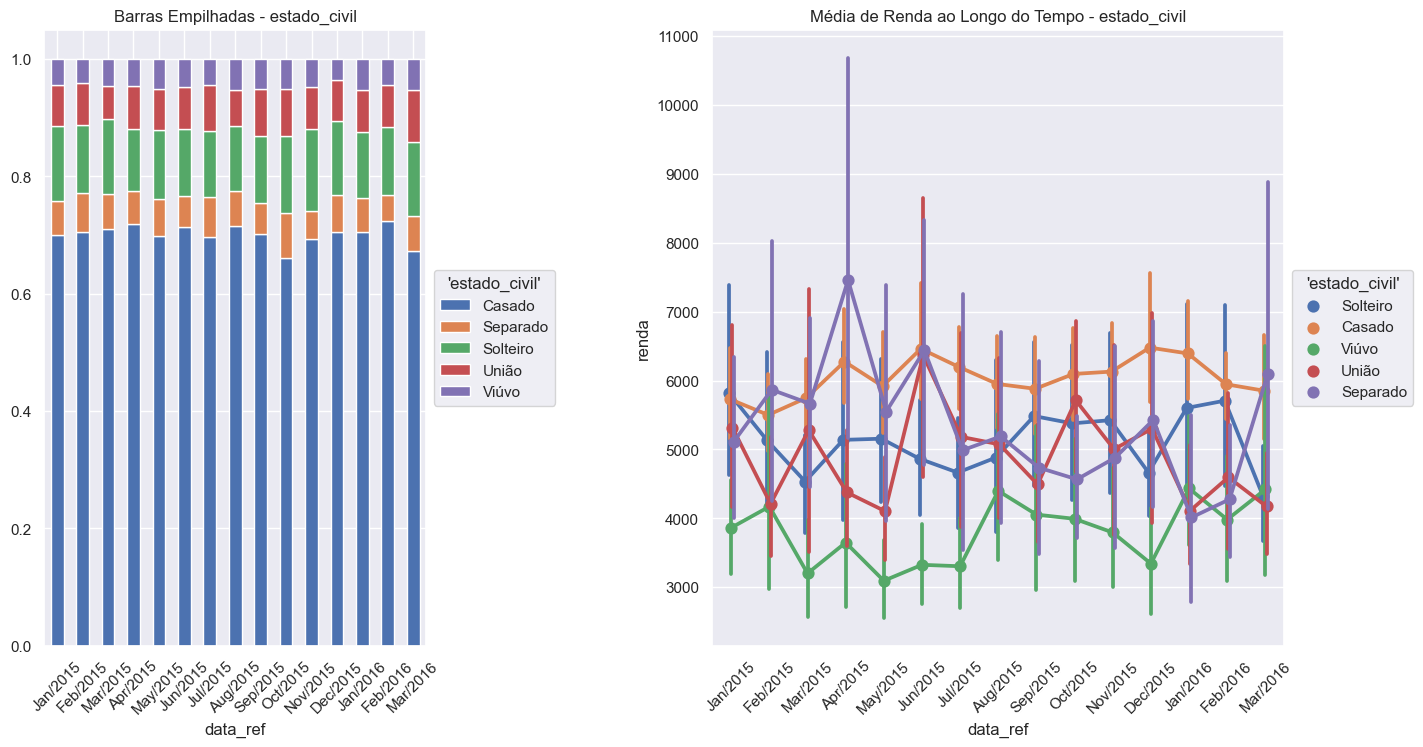

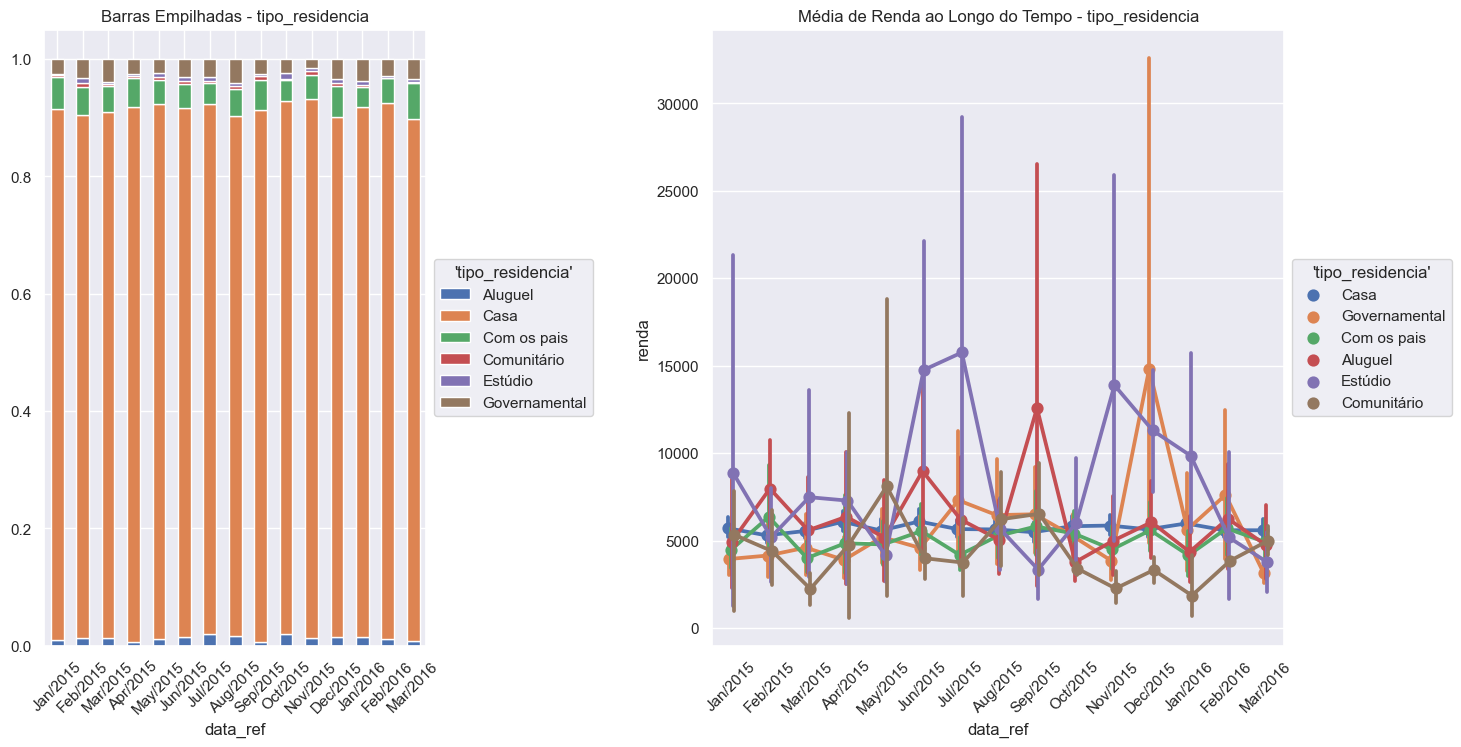

In [138]:
# Convertendo a coluna 'data_ref' para o formato datetime
dados_renda['data_ref'] = pd.to_datetime(dados_renda['data_ref'])

# Obtendo colunas qualitativas
qualitative_columns = dados_renda.select_dtypes(include=['object', 'boolean']).columns

# Configurando o tamanho padrão das figuras
plt.rc('figure', figsize=(16, 8))  # Ajustando o tamanho conforme necessário

# Iterando sobre as colunas qualitativas
for col in qualitative_columns:
    fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.5]})
    fig.subplots_adjust(wspace=.6)

    # Gráfico de barras empilhadas
    dados_renda_crosstab = pd.crosstab(index=dados_renda['data_ref'], columns=dados_renda[col], normalize='index')
    ax0 = dados_renda_crosstab.plot.bar(stacked=True, ax=axes[0])
    tick_labels = dados_renda['data_ref'].dt.strftime('%b/%Y').unique()
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    ax0.legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")

    # Gráfico de ponto para a média de renda ao longo do tempo
    sns.pointplot(x='data_ref', y='renda', hue=col, data=dados_renda, dodge=True, errorbar=('ci', 95), ax=axes[1])
    axes[1].set_xticks(list(range(len(tick_labels))))
    axes[1].set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")

    # Ajustes visuais
    axes[0].set_title(f'Barras Empilhadas - {col}')
    axes[1].set_title(f'Média de Renda ao Longo do Tempo - {col}')
    
    # Exibindo os gráficos
    plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [139]:
# Limpeza dos dados
dados_renda = dados_renda.drop(columns='data_ref', errors='ignore').dropna()

### Conversão das variáveis categóricas em variáveis numéricas (dummies)

In [140]:
# Criando variáveis dummy
dados_renda_dummies = pd.get_dummies(dados_renda)

# Exibindo informações sobre o DataFrame com variáveis dummy
info_table_dummies = PrettyTable()
info_table_dummies.field_names = ["Nome da Coluna", "Contagem Não Nula", "Tipo de Dados"]

# Preenchendo a tabela com informações de cada coluna
for column in dados_renda_dummies.columns:
    info_table_dummies.add_row([column, dados_renda_dummies[column].count(), dados_renda_dummies[column].dtype])

# Exibindo a tabela de informações com variáveis dummy
print(info_table_dummies)

+-------------------------------+-------------------+---------------+
|         Nome da Coluna        | Contagem Não Nula | Tipo de Dados |
+-------------------------------+-------------------+---------------+
|        posse_de_veiculo       |       12090       |      bool     |
|        posse_de_imovel        |       12090       |      bool     |
|           qtd_filhos          |       12090       |     int64     |
|             idade             |       12090       |     int64     |
|         tempo_emprego         |       12090       |    float64    |
|     qt_pessoas_residencia     |       12090       |    float64    |
|             renda             |       12090       |    float64    |
|             sexo_F            |       12090       |     uint8     |
|             sexo_M            |       12090       |     uint8     |
|     tipo_renda_Assalariado    |       12090       |     uint8     |
|      tipo_renda_Bolsista      |       12090       |     uint8     |
|     tipo_renda_Emp

In [141]:
# Calculando a correlação com a variável alvo 'renda'
correlation_result = (dados_renda_dummies.corr()['renda']
    .sort_values(ascending=False)
    .to_frame()
    .reset_index()
    .rename(columns={'index': 'variável', 'renda': 'correlação'})
    .style.bar(color=['darkred', 'darkgreen'], align=0))

# Exibindo o resultado da correlação
correlation_result

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Divisão da base em treino e teste


In [142]:
# Separando as variáveis independentes e a variável alvo e dividindo o conjunto de dados
X = dados_renda_dummies.drop(columns='renda')
y = dados_renda_dummies['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Exibindo informações em uma PrettyTable
shape_info_table = PrettyTable()
shape_info_table.field_names = ["Conjunto", "Shape de X", "Comprimento de y"]

shape_info_table.add_row(["Dados Originais", X.shape, len(y)])
shape_info_table.add_row(["Conjunto de Treinamento", X_train.shape, len(y_train)])
shape_info_table.add_row(["Conjunto de Teste", X_test.shape, len(y_test)])

print(shape_info_table)

+-------------------------+-------------+------------------+
|         Conjunto        |  Shape de X | Comprimento de y |
+-------------------------+-------------+------------------+
|     Dados Originais     | (12090, 29) |      12090       |
| Conjunto de Treinamento |  (9067, 29) |       9067       |
|    Conjunto de Teste    |  (3023, 29) |       3023       |
+-------------------------+-------------+------------------+


## Seleção de hiperparâmetros do modelo com for loop

In [143]:
# Criando uma lista de todos os hyperparâmetros possíveis
hyperparameters = list(product(range(1, 21), range(1, 31)))

# Calculando o score para cada combinação de hyperparâmetros
score = pd.DataFrame({
    'max_depth': [max_depth for max_depth, min_samples_leaf in hyperparameters],
    'min_samples_leaf': [min_samples_leaf for max_depth, min_samples_leaf in hyperparameters],
    'score': [(reg := DecisionTreeRegressor(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
               .fit(X_train, y_train)
               .score(X_test, y_test)) for max_depth, min_samples_leaf in hyperparameters]
}).sort_values(by='score', ascending=False)

# Ordenando os resultados pelo score em ordem decrescente
score = score.sort_values(by='score', ascending=False)

# Exibindo informações em uma PrettyTable
hyperparameter_info_table = PrettyTable()
hyperparameter_info_table.field_names = ["Max Depth", "Min Samples Leaf", "Score"]

for _, row in score.iterrows():
    hyperparameter_info_table.add_row([row['max_depth'], row['min_samples_leaf'], row['score']])

print(hyperparameter_info_table)

+-----------+------------------+----------------------+
| Max Depth | Min Samples Leaf |        Score         |
+-----------+------------------+----------------------+
|    8.0    |       4.0        | 0.41712196855101524  |
|    19.0   |       4.0        | 0.40109099408988824  |
|    9.0    |       4.0        |  0.4010049114234219  |
|    14.0   |       4.0        |  0.4002457610164857  |
|    9.0    |       6.0        |  0.399395388412915   |
|    10.0   |       7.0        |  0.3985636426650728  |
|    17.0   |       4.0        | 0.39836304191249927  |
|    10.0   |       6.0        | 0.39836150691809524  |
|    16.0   |       4.0        | 0.39789442854171275  |
|    13.0   |       4.0        |  0.3973673027139526  |
|    12.0   |       4.0        | 0.39733962099017484  |
|    20.0   |       4.0        |  0.3969431010751908  |
|    11.0   |       7.0        |  0.3960290756131798  |
|    10.0   |       4.0        | 0.39549391175413895  |
|    17.0   |       6.0        | 0.3951597599503

### Rodando o modelo


In [144]:
# Criando e treinando o modelo de Regressão com Árvore de Decisão
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

Visualização gráfica da árvore com plot_tree

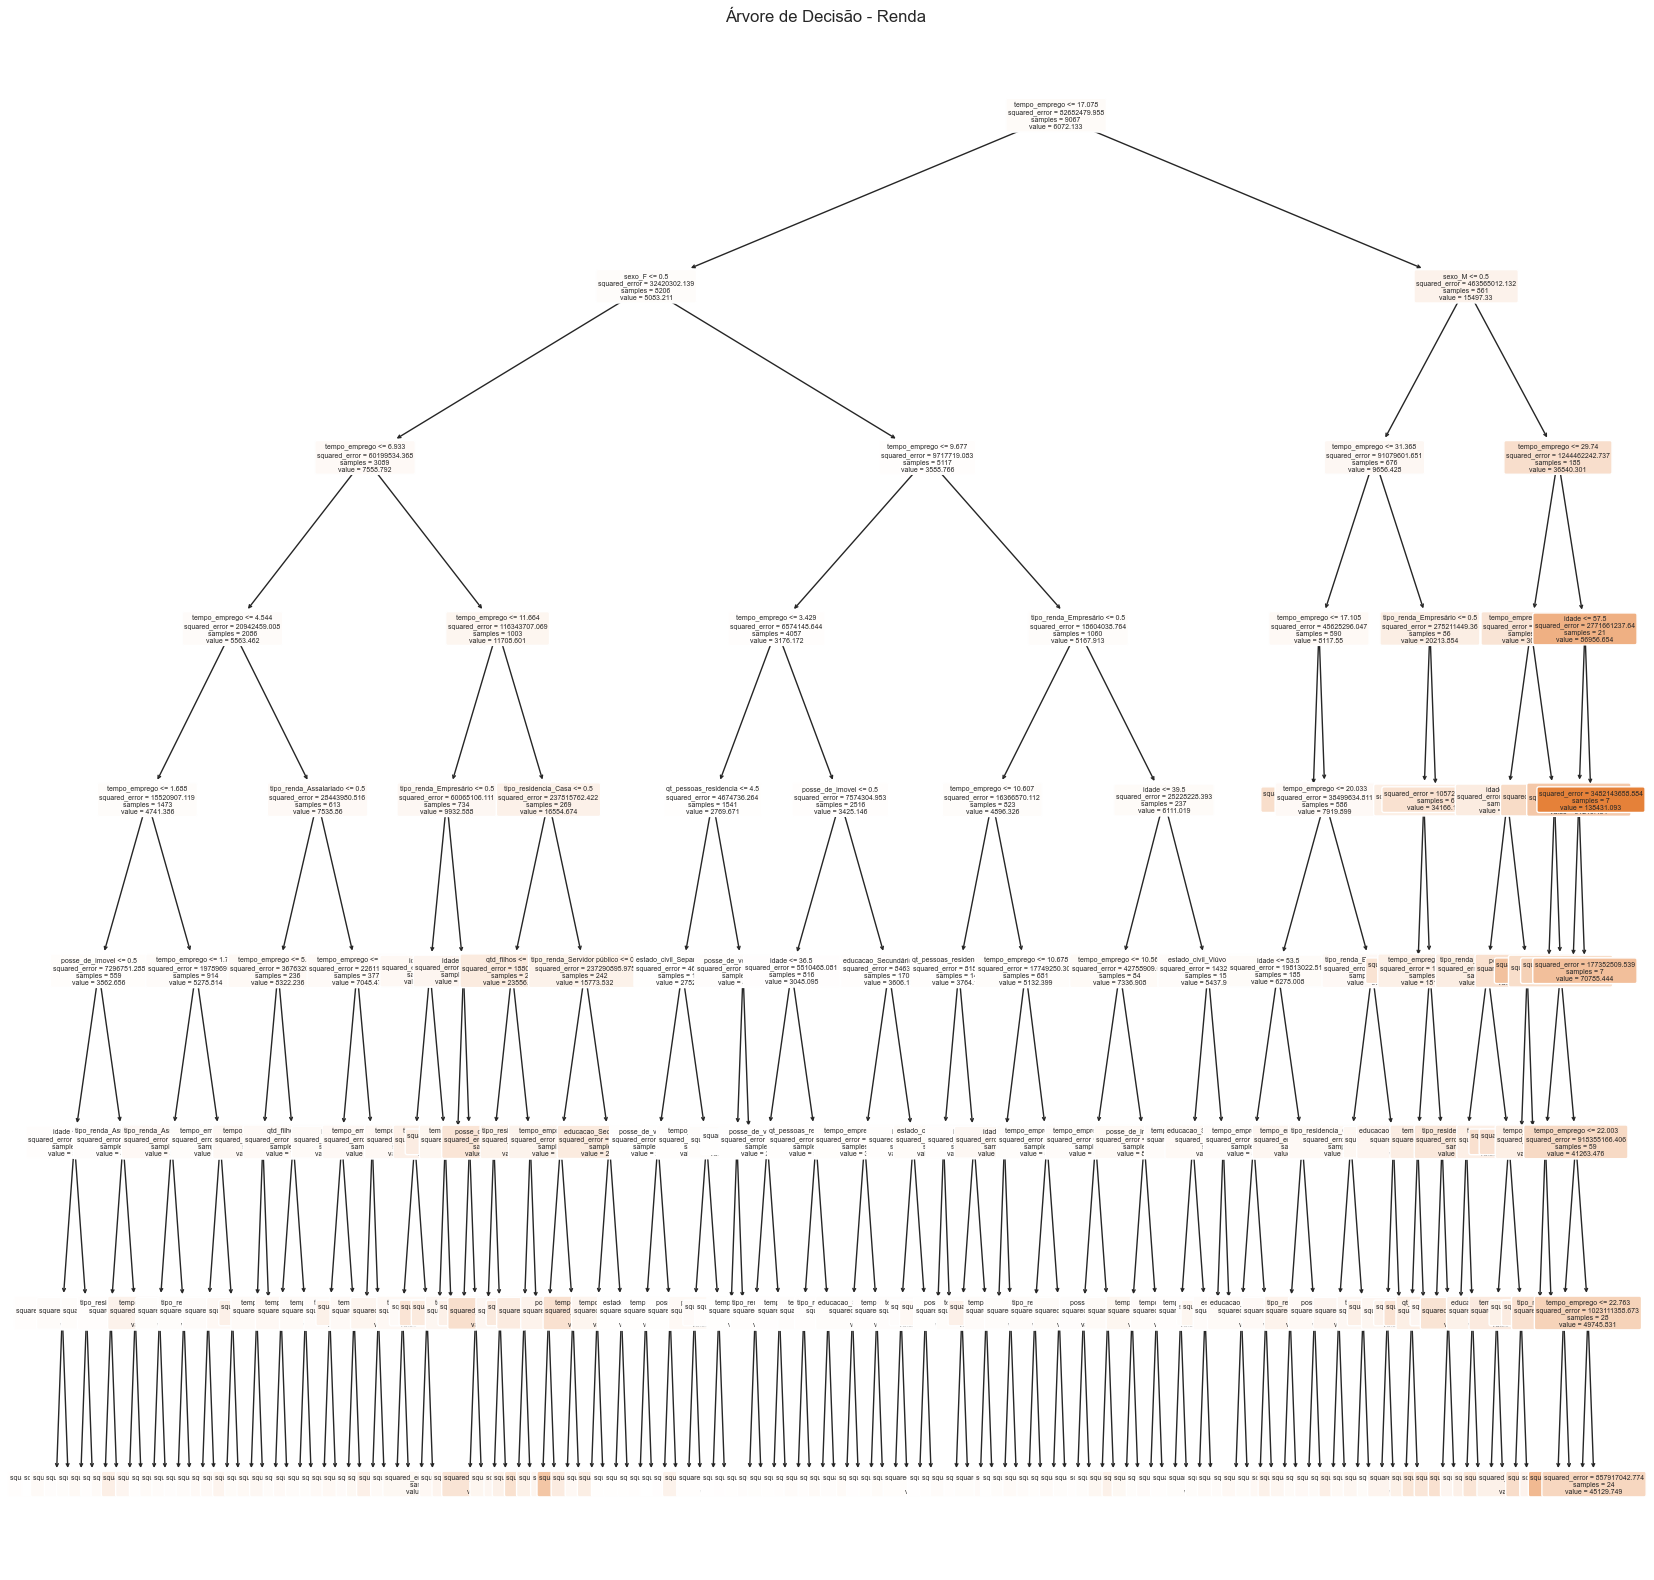

In [145]:
# Configurando o tamanho padrão das figuras
plt.rc('figure', figsize=(20, 20))

# Plotando a árvore de decisão
plt.figure()
plot_tree(reg_tree, feature_names=list(X_train.columns), filled=True, rounded=True, fontsize=5)

# Exibindo a árvore de decisão
plt.title("Árvore de Decisão - Renda")
plt.show()

Visualização impressa da árvore

In [146]:
# Imprimindo texto representando a árvore de decisão
print(tree.export_text(reg_tree, feature_names=list(X_train.columns)))

|--- tempo_emprego <= 17.08
|   |--- sexo_F <= 0.50
|   |   |--- tempo_emprego <= 6.93
|   |   |   |--- tempo_emprego <= 4.54
|   |   |   |   |--- tempo_emprego <= 1.69
|   |   |   |   |   |--- posse_de_imovel <= 0.50
|   |   |   |   |   |   |--- idade <= 52.50
|   |   |   |   |   |   |   |--- qtd_filhos <= 2.50
|   |   |   |   |   |   |   |   |--- value: [3237.54]
|   |   |   |   |   |   |   |--- qtd_filhos >  2.50
|   |   |   |   |   |   |   |   |--- value: [1415.27]
|   |   |   |   |   |   |--- idade >  52.50
|   |   |   |   |   |   |   |--- idade <= 56.00
|   |   |   |   |   |   |   |   |--- value: [6817.46]
|   |   |   |   |   |   |   |--- idade >  56.00
|   |   |   |   |   |   |   |   |--- value: [4458.54]
|   |   |   |   |   |--- posse_de_imovel >  0.50
|   |   |   |   |   |   |--- tipo_renda_Assalariado <= 0.50
|   |   |   |   |   |   |   |--- idade <= 54.50
|   |   |   |   |   |   |   |   |--- value: [4821.44]
|   |   |   |   |   |   |   |--- idade >  54.50
|   |   |   |   |  

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [147]:
# Calculando o coeficiente de determinação (R²) para os conjuntos de treino e teste
r2_train = reg_tree.score(X_train, y_train)
r2_test = reg_tree.score(X_test, y_test)

# Formatando e exibindo o coeficiente de determinação (R²) em uma PrettyTable
r2_info_table = PrettyTable()
r2_info_table.field_names = ["Conjunto", f"R² - Árvore (Profundidade: {reg_tree.get_depth()})"]
r2_info_table.add_row(["Treino", f"{r2_train:.2f}".replace(".", ",")])
r2_info_table.add_row(["Teste", f"{r2_test:.2f}".replace(".", ",")])

print(r2_info_table)

+----------+-------------------------------+
| Conjunto | R² - Árvore (Profundidade: 8) |
+----------+-------------------------------+
|  Treino  |              0,60             |
|  Teste   |              0,42             |
+----------+-------------------------------+


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [148]:
# Dados de entrada para previsão de renda
entrada_data = {
    'sexo': 'M',
    'posse_de_veiculo': False,
    'posse_de_imovel': True,
    'qtd_filhos': 1,
    'tipo_renda': 'Assalariado',
    'educacao': 'Superior completo',
    'estado_civil': 'Solteiro',
    'tipo_residencia': 'Casa',
    'idade': 34,
    'tempo_emprego': None,
    'qt_pessoas_residencia': 1}

# Criando um DataFrame com os dados de entrada
entrada = pd.DataFrame([entrada_data])

# Convertendo as variáveis categóricas em variáveis dummy
entrada = pd.get_dummies(entrada).reindex(columns=X.columns, fill_value=0)

# Concatenando o DataFrame de entrada com os dados originais e preenchendo valores ausentes com 0
entrada = pd.concat([X, entrada], sort=False).fillna(0).tail(1)

# Realizando a previsão de renda
predicted_renda = np.round(reg_tree.predict(entrada), 2)

# Verificando se a previsão é um array numpy e extraindo o valor
if isinstance(predicted_renda, np.ndarray):
    predicted_renda = predicted_renda[0]

# Exibindo a renda estimada
print(f"Renda estimada: R${predicted_renda:.2f}".replace('.', ','))

Renda estimada: R$3671,41
